# Chargement du modèle

In [1]:
# Load libraries
import sklearn
import joblib

# Get scikit-learn version
scikit_version = sklearn.__version__

# Load the model
pipe = joblib.load("models/model_{version}.pkl".format(version=scikit_version))

# Save the model as pickle file for the web app
joblib.dump(pipe, "web/models/model_{version}.pkl".format(version=scikit_version))

# display the model
pipe

Pipeline(memory=None,
         steps=[('preprocess',
                 Pipeline(memory=None,
                          steps=[('scale',
                                  StandardScaler(copy=True, with_mean=True,
                                                 with_std=True))],
                          verbose=False)),
                ('model',
                 LogisticRegression(C=1.3348904828439347,
                                    class_weight='balanced', dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=477,
                                    multi_class='auto', n_jobs=None,
                                    penalty='l2', random_state=None,
                                    solver='liblinear',
                                    tol=2.0533801171184104e-05, verbose=0,
                                    warm_start=True))],
         verbose=False)

# Préparation des données transformées

In [2]:
# load libraries
import pandas as pd

data_train_featured = pd.read_csv('data/cleaned/data_train_featured.csv', index_col='SK_ID_CURR')
print('Featured training data set shape: ', data_train_featured.shape)
data_train_featured.head()

Featured training data set shape:  (288028, 216)


,EXT_SOURCE_2,client_installments_AMT_PAYMENT_min_sum,DAYS_BIRTH,AMT_CREDIT,AMT_ANNUITY,DAYS_EMPLOYED,DAYS_ID_PUBLISH,DAYS_REGISTRATION,previous_loans_CNT_PAYMENT_mean,client_cash_CNT_INSTALMENT_FUTURE_min_max,...,previous_loans_WEEKDAY_APPR_PROCESS_START_WEDNESDAY_count_norm,previous_loans_NAME_CONTRACT_STATUS_Approved_count,client_cash_CNT_INSTALMENT_min_max,"WALLSMATERIAL_MODE_Stone, brick",previous_loans_NAME_TYPE_SUITE_Children_count_norm,previous_loans_PRODUCT_COMBINATION_Cash_count_norm,previous_loans_NAME_GOODS_CATEGORY_Sport and Leisure_count_norm,previous_loans_NAME_SELLER_INDUSTRY_Consumer electronics_count,client_cash_CNT_INSTALMENT_min_min,TARGET
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,
100002,0.262949,175783.725,-9461,406597.5,24700.5,-637,-2120,-3648.0,24.000000,6.0,...,0.0,1.0,24.0,1,0.0,0.000000,0.0,0.0,24.0,1
100003,0.622246,1154108.295,-16765,1293502.5,35698.5,-1188,-291,-1186.0,10.000000,1.0,...,0.0,3.0,12.0,0,0.0,0.000000,0.0,1.0,6.0,0
100004,0.555912,16071.750,-19046,135000.0,6750.0,-225,-2531,-4260.0,4.000000,0.0,...,0.0,1.0,3.0,0,0.0,0.000000,0.0,0.0,3.0,0
100006,0.650442,994476.690,-19005,312682.5,29686.5,-3039,-2437,-9833.0,23.000000,3.0,...,0.0,5.0,12.0,0,0.0,0.222222,0.0,1.0,1.0,0
100007,0.322738,483756.390,-19932,513000.0,21865.5,-3038,-3458,-4311.0,20.666667,13.0,...,0.0,6.0,24.0,0,0.0,0.000000,0.0,3.0,10.0,0


In [3]:
from sklearn.impute import SimpleImputer

# Split features and targets
target_train = data_train_featured['TARGET']
data_train_featured = data_train_featured.drop(columns='TARGET')
feature_names = data_train_featured.columns
index = data_train_featured.index

# Imputations
imp_mean = SimpleImputer(strategy='mean')
imp_mean.fit(data_train_featured)
data_train_featured = pd.DataFrame(
    imp_mean.transform(data_train_featured),
    columns=feature_names,
    index=index
)

In [4]:
# Get the predictions of the model (for positive class: default)
y_train_pred = pipe.predict_proba(data_train_featured)[:,1]
y_train_pred = pd.Series(
    y_train_pred,
    index=data_train_featured.index,
)

# Save the predictions
y_train_pred.to_csv(
    'data/cleaned/target_train_predictions.csv',
    header='TARGET')

## Échantillonage (pour l'application web)

In [5]:
# Sampling
data_processed = data_train_featured.sample(n=5000, random_state=42)

# Save the sample for web app
data_processed.to_csv('web/data/data_processed.csv')

# Display
data_processed

,EXT_SOURCE_2,client_installments_AMT_PAYMENT_min_sum,DAYS_BIRTH,AMT_CREDIT,AMT_ANNUITY,DAYS_EMPLOYED,DAYS_ID_PUBLISH,DAYS_REGISTRATION,previous_loans_CNT_PAYMENT_mean,client_cash_CNT_INSTALMENT_FUTURE_min_max,...,WALLSMATERIAL_MODE_Panel,previous_loans_WEEKDAY_APPR_PROCESS_START_WEDNESDAY_count_norm,previous_loans_NAME_CONTRACT_STATUS_Approved_count,client_cash_CNT_INSTALMENT_min_max,"WALLSMATERIAL_MODE_Stone, brick",previous_loans_NAME_TYPE_SUITE_Children_count_norm,previous_loans_PRODUCT_COMBINATION_Cash_count_norm,previous_loans_NAME_GOODS_CATEGORY_Sport and Leisure_count_norm,previous_loans_NAME_SELLER_INDUSTRY_Consumer electronics_count,client_cash_CNT_INSTALMENT_min_min
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,
346770,0.735100,196888.950,-22645.0,173196.0,9054.0,365243.0,-3916.0,-11300.0,9.600000,10.0,...,1.0,0.166667,5.0,12.0,0.0,0.166667,0.166667,0.0,1.0,11.0
245991,0.698223,27812.520,-17804.0,492543.0,32197.5,-1148.0,-1366.0,-5889.0,17.000000,0.0,...,0.0,0.500000,1.0,8.0,0.0,0.000000,0.000000,0.0,0.0,8.0
366644,0.526917,52746.840,-10433.0,396850.5,19431.0,-561.0,-3097.0,-9876.0,12.666667,0.0,...,1.0,0.000000,3.0,18.0,0.0,0.000000,0.000000,0.0,2.0,4.0
278520,0.725762,191560.950,-22474.0,715095.0,55471.5,365243.0,-4778.0,-13357.0,10.000000,1.0,...,1.0,0.000000,1.0,10.0,0.0,0.000000,0.000000,0.0,1.0,10.0
280042,0.631152,736715.475,-21838.0,284400.0,16456.5,-2668.0,-4301.0,-5871.0,23.333333,4.0,...,0.0,0.111111,9.0,36.0,1.0,0.000000,0.000000,0.0,0.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168858,0.698089,413679.150,-14863.0,1546020.0,45202.5,-722.0,-4107.0,-2490.0,24.000000,0.0,...,0.0,0.000000,1.0,15.0,0.0,0.000000,0.000000,0.0,0.0,15.0
141264,0.483432,13181.580,-15283.0,450000.0,21888.0,-1537.0,-5123.0,-7745.0,42.000000,0.0,...,1.0,0.500000,5.0,5.0,0.0,0.000000,0.312500,0.0,0.0,4.0
435625,0.346411,57.420,-20719.0,598486.5,21627.0,365243.0,-714.0,-3428.0,12.000000,0.0,...,0.0,1.000000,1.0,12.0,0.0,0.000000,0.000000,0.0,0.0,12.0


# Préparation des données initiales

In [6]:
import pandas as pd

data_train_original = pd.read_csv('data/input/application_train.csv', index_col='SK_ID_CURR')
print('Original training set (application_set) shape: ', data_train_original.shape)

Original training set (application_set) shape:  (307511, 121)


In [7]:
mask = data_train_original.index.isin(data_train_featured.index)

# Keep only points that are in the engineered set
data_train_original = data_train_original[mask]

# Drop target column
data_train_original = data_train_original.drop(columns='TARGET')

In [8]:
# Sampling
data_original = data_train_original.sample(n=5000, random_state=42)

# Save the sample for web app
data_original.to_csv('web/data/data_original.csv')

# Display
data_original

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,
346770,Cash loans,F,N,Y,0,67500.0,173196.0,9054.0,153000.0,Unaccompanied,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,4.0
245991,Cash loans,F,Y,Y,0,166500.0,492543.0,32197.5,445500.0,Unaccompanied,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0
366644,Cash loans,M,Y,N,0,103500.0,396850.5,19431.0,279000.0,Unaccompanied,...,0,0,0,0,0.0,0.0,1.0,0.0,0.0,0.0
278520,Cash loans,F,N,Y,0,157500.0,715095.0,55471.5,675000.0,Family,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
280042,Cash loans,M,N,Y,0,135000.0,284400.0,16456.5,225000.0,Unaccompanied,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168858,Cash loans,F,N,N,0,135000.0,1546020.0,45202.5,1350000.0,Family,...,0,0,0,0,0.0,0.0,0.0,2.0,0.0,0.0
141264,Cash loans,M,N,Y,0,135000.0,450000.0,21888.0,450000.0,Unaccompanied,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0
435625,Cash loans,F,N,Y,0,135000.0,598486.5,21627.0,454500.0,Unaccompanied,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
from sklearn.impute import SimpleImputer

# Imputation of missing values for numerical features
numerical_features = list(data_train_original.select_dtypes(include='number').columns)
data_train_original[numerical_features] = SimpleImputer(strategy='mean').fit_transform(data_train_original[numerical_features])

# Imputation of missing values for categorical features
categorical_features = list(data_train_original.select_dtypes(include='object').columns)
data_train_original[categorical_features] = SimpleImputer(strategy='constant', fill_value='missing').fit_transform(data_train_original[categorical_features])

# Display results
print("Remaining missing values:", data_train_original.isna().any().any())

Remaining missing values: False


In [10]:
# label encoding of each categorical feature
categorical_names = {} # dictionnary of modalities for each cat. feature
label_encoders = {} # dictionnary of encoders for each cat. feature
for feature in categorical_features:
    le = sklearn.preprocessing.LabelEncoder()
    data_train_original.loc[:, feature] = le.fit_transform(data_train_original.loc[:, feature])
    categorical_names[feature] = le.classes_
    label_encoders[feature] = le

# Save the processed original data
data_train_original.to_csv('data/cleaned/data_train_original.csv')

In [11]:
# Sampling
data_original_le = data_train_original.sample(n=5000, random_state=42)

# Save the sample for web app
data_original_le.to_csv('web/data/data_original_le.csv')

# Display
data_original_le

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,
346770,0,0,0,1,0.0,67500.0,173196.0,9054.0,153000.0,6,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,4.00000
245991,0,0,1,1,0.0,166500.0,492543.0,32197.5,445500.0,6,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,2.00000
366644,0,1,1,0,0.0,103500.0,396850.5,19431.0,279000.0,6,...,0.0,0.0,0.0,0.0,0.000000,0.000000,1.000000,0.000000,0.000000,0.00000
278520,0,0,0,1,0.0,157500.0,715095.0,55471.5,675000.0,1,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
280042,0,1,0,1,0.0,135000.0,284400.0,16456.5,225000.0,6,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,5.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168858,0,0,0,0,0.0,135000.0,1546020.0,45202.5,1350000.0,1,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,2.000000,0.000000,0.00000
141264,0,1,0,1,0.0,135000.0,450000.0,21888.0,450000.0,6,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,2.00000
435625,0,0,0,1,0.0,135000.0,598486.5,21627.0,454500.0,6,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000


# Modèle de substitution (*Surrogate model*)

## Interprétation globale

In [12]:
from sklearn.tree import DecisionTreeRegressor

# Instanciate a surrogate model without depth limit to overfit
sur_dt = DecisionTreeRegressor()

# Over-fitting the surrogate model on original features
sur_dt.fit(data_train_original, y_train_pred)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [13]:
# Get scikit-learn version
scikit_version = sklearn.__version__

# Save the model as pickle file
joblib.dump(sur_dt, "web/models/surrogate_model_{version}.pkl".format(version=scikit_version))

['web/models/surrogate_model_0.21.3.pkl']

In [14]:
print("Main features per importance:")

sum_val = 0
for col, val in sorted(zip(data_train_original.columns, sur_dt.feature_importances_,), key=lambda x: x[1], reverse=True,)[:10]:
    print(f"{col:28}{val:10.3f}")
    sum_val += val
    
print("Percentage of the model explained by the 10 first features:", sum_val*100)

Main features per importance:
EXT_SOURCE_2                     0.368
DAYS_BIRTH                       0.103
NAME_EDUCATION_TYPE              0.040
EXT_SOURCE_3                     0.039
DAYS_LAST_PHONE_CHANGE           0.037
CODE_GENDER                      0.035
DAYS_ID_PUBLISH                  0.031
DAYS_REGISTRATION                0.022
DAYS_EMPLOYED                    0.019
AMT_ANNUITY                      0.016
Percentage of the model explained by the 10 first features: 71.14048352711886


## Interprétation locale

In [15]:
SK_ID_CURR = 100002
application_data = data_train_original.loc[SK_ID_CURR:SK_ID_CURR]

print("Application ID:", SK_ID_CURR)
print("Predicted value:", y_train_pred.loc[SK_ID_CURR])

Application ID: 100002
Predicted value: 0.8417595358522602


In [16]:
from treeinterpreter import treeinterpreter as ti

# Computation of the prediction, bias and contribs from surrogate model
prediction, bias, contribs = ti.predict(sur_dt, application_data)

print("Prediction:", prediction)

print("Bias (trainset mean):", bias)

print("Main features contributions:")
for contrib, feature in sorted(zip(contribs[0], data_train_original.columns), key=lambda x: abs(x[0]), reverse=True,):
    if contrib != 0:
        print("   {:32}{}".format(feature, contrib))

Prediction: [[0.84175954]]
Bias (trainset mean): [0.42464491]
Main features contributions:
   EXT_SOURCE_2                    0.12542015088740266
   DAYS_BIRTH                      0.06348533572266091
   CODE_GENDER                     0.05041459286842365
   DEF_30_CNT_SOCIAL_CIRCLE        0.04755578403967353
   AMT_GOODS_PRICE                 0.027402686138232935
   NAME_EDUCATION_TYPE             0.022580490545719534
   DAYS_LAST_PHONE_CHANGE          0.01834547665415953
   ORGANIZATION_TYPE               0.018045583788796837
   DAYS_ID_PUBLISH                 0.017498736200624587
   WALLSMATERIAL_MODE              -0.016733431717159353
   HOUR_APPR_PROCESS_START         -0.013695288186596821
   FLAG_DOCUMENT_3                 0.012374783640662579
   NAME_CONTRACT_TYPE              0.009710204595905325
   YEARS_BEGINEXPLUATATION_MEDI    0.00941549145422238
   REG_CITY_NOT_LIVE_CITY          -0.009369183776955392
   BASEMENTAREA_AVG                0.007986378089045343
   REGION_POPULA

## Graphs

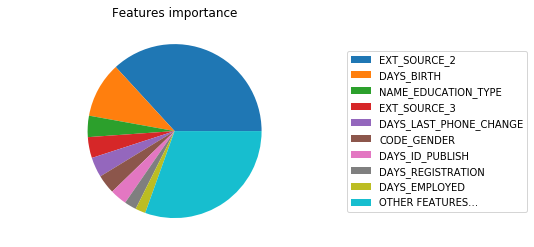

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
# sns.set()

# initialization
sum_val = 0
labels = []
frequencies = []

# get the labels and frequencies of 10 most important features
for col, val in sorted(zip(data_train_original.columns, sur_dt.feature_importances_,), key=lambda x: x[1], reverse=True,)[:9]:
    labels.append(col)
    frequencies.append(val)
    sum_val += val

# complete the data with other features
labels.append("OTHER FEATURES…")
frequencies.append(1 - sum_val)

fig, ax = plt.subplots()
ax.axis("equal")
ax.pie(frequencies,
        # autopct="%1.1f pourcents",
      )
plt.title("Features importance")
plt.legend(
    labels,
    loc='center left',
    bbox_to_anchor=(1, 0.5),
)
plt.show()
fig.savefig('plots/FI.png')

# Description des variables

In [21]:
# Loading the file with descriptions
features_descriptions = pd.read_csv('data/HomeCredit_columns_description.csv', encoding='iso-8859-1')
features_descriptions.head(2)

,Unnamed: 0,Table,Row,Description,Special
0,1,application_{train|test}.csv,SK_ID_CURR,ID of loan in our sample,NaN
1,2,application_{train|test}.csv,TARGET,Target variable (1 - client with payment diffi...,NaN


In [22]:
# filtering features from 'application_train' table
mask = features_descriptions['Table'] == 'application_{train|test}.csv'
features_descriptions = features_descriptions[mask]

# setting the name of the feature as index
features_descriptions = features_descriptions.set_index('Row')

# keeping only description
features_descriptions = features_descriptions['Description']

# display result
features_descriptions.head()

Row
SK_ID_CURR                                     ID of loan in our sample
TARGET                Target variable (1 - client with payment diffi...
NAME_CONTRACT_TYPE          Identification if loan is cash or revolving
CODE_GENDER                                        Gender of the client
FLAG_OWN_CAR                              Flag if the client owns a car
Name: Description, dtype: object

In [23]:
# Checking the result
for column in data_train_original.columns[:5]:
    print(column, features_descriptions[column])

NAME_CONTRACT_TYPE Identification if loan is cash or revolving
CODE_GENDER Gender of the client
FLAG_OWN_CAR Flag if the client owns a car
FLAG_OWN_REALTY Flag if client owns a house or flat
CNT_CHILDREN Number of children the client has


In [24]:
# Save the data for web app
features_descriptions.to_csv('web/data/features_descriptions.csv', header='description')

In [25]:
features_descriptions

Row
SK_ID_CURR                                             ID of loan in our sample
TARGET                        Target variable (1 - client with payment diffi...
NAME_CONTRACT_TYPE                  Identification if loan is cash or revolving
CODE_GENDER                                                Gender of the client
FLAG_OWN_CAR                                      Flag if the client owns a car
                                                    ...                        
AMT_REQ_CREDIT_BUREAU_DAY     Number of enquiries to Credit Bureau about the...
AMT_REQ_CREDIT_BUREAU_WEEK    Number of enquiries to Credit Bureau about the...
AMT_REQ_CREDIT_BUREAU_MON     Number of enquiries to Credit Bureau about the...
AMT_REQ_CREDIT_BUREAU_QRT     Number of enquiries to Credit Bureau about the...
AMT_REQ_CREDIT_BUREAU_YEAR    Number of enquiries to Credit Bureau about the...
Name: Description, Length: 122, dtype: object

# Données aggrégées

In [26]:
import pandas as pd

data_train_original = pd.read_csv('data/input/application_train.csv', index_col='SK_ID_CURR')
print('Original training set (application_set) shape: ', data_train_original.shape)

Original training set (application_set) shape:  (307511, 121)


In [27]:
data_train_original.head()

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,
100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [28]:
# Aggregate the data from loan applications
data_agg_num = data_train_original.mean(numeric_only=True)
data_agg_cat = data_train_original.select_dtypes(exclude='number').mode().iloc[0]
data_agg = pd.concat([data_agg_num, data_agg_cat])

In [29]:
# Drop the target
data_agg = data_agg.drop('TARGET')

In [30]:
# Save the data for web app
data_agg.to_csv('web/data/data_agg.csv', header='mean or mode', index=True)

In [31]:
data_agg.head()

CNT_CHILDREN        0.417052
AMT_INCOME_TOTAL      168798
AMT_CREDIT            599026
AMT_ANNUITY          27108.6
AMT_GOODS_PRICE       538396
dtype: object

In [32]:
# aggregated data of the train set for comparison to current applicant
data_agg = pd.read_csv("web/data/data_agg.csv", index_col=0)

In [33]:
data_agg.head()

,0
CNT_CHILDREN,0.4170517477423572
AMT_INCOME_TOTAL,168797.9192969845
AMT_CREDIT,599025.9997057016
AMT_ANNUITY,27108.573909183444
AMT_GOODS_PRICE,538396.2074288895
